# Data 200: Database Systems and Data Management for Data Analytics


# Name: Michael Freda

In [ ]:
# imports all needed packages
import pandas as pd
import time
import random
from selenium import webdriver
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# define "scrape comments from a single page" func
def get_jobs():
    # initialize jobs list
    jobs = []
    # initialize num to 0
    num = 0
    # for i in range() loop where range is 15 as there is 15 job postings per page
    for i in range(15):
        # adds two to num as 6 & 12 are missing for our elements down below
        if (num == 5) or (num == 11):
            num = num + 2
        # adds one to num every loop
        else: 
            num = num + 1
        # Job title - finds the jobtitle element & converts to a cleaned text
        jobtitle_element = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(num) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[1]/h2')
        jobtitle = jobtitle_element.text
        jobtitle = re.sub('\n', ' ', jobtitle)

        # Company name - finds the jobcompany element & converts to a cleaned text
        jobcompany_element = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(num) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/span[1]')
        jobcompany = jobcompany_element.text
        jobcompany = re.sub('\n', ' ', jobcompany)
        
        # Job description - finds the jobdesc element & converts to a cleaned text
        jobdesc_element = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(num) + ']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div/div')
        jobdesc = jobdesc_element.text
        jobdesc = re.sub('\n', ' ', jobdesc)

        # Job location - finds the jobloc element & converts to a cleaned text
        jobloc_element = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(num) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/div[1]')
        jobloc = jobloc_element.text
        jobloc = re.sub('\n.+', ' ', jobloc)

        # Date posted - finds the jobdate element & converts to a cleaned text
        jobdate_element = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(num) + ']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div/span')
        jobdate = jobdate_element.text
        # if uploaded longer than 24 hours ago, finds the number of days since first posted
        if 'ago' in jobdate:
            jobdate = re.findall('\d+.+', jobdate)
            jobdate = jobdate[0]
        # if uploaded less than 24 hours ago, marks as Today
        elif 'Today' in jobdate:
            jobdate = re.findall('Today', jobdate)
            jobdate = jobdate[0]
        # if uploaded very recently, marks as Just Posted
        elif 'Just posted' in jobdate:
            jobdate = re.findall('Just posted', jobdate)
            jobdate = jobdate[0]

        # Job attributes - finds the jobattributes element & converts to a cleaned text
        jobattributes_element = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(num) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[3]')
        jobattributes = jobattributes_element.text
        
        # appends jobtitle, jobcompany, jobdesc, jobloc, jobdate, and jobattributes to jobs
        jobs.append([jobtitle, jobcompany, jobdesc, jobloc, jobdate, jobattributes])
        
    # return jobs
    return jobs

In [ ]:
# set display settings to max
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 999)
# prevents pandas from cutting jobdesc short
pd.set_option('display.max_colwidth', -1)
# initialize df_out dataframe
df_out = pd.DataFrame()
# for j in range() loop where range is 62 as there is 62 pages
for j in range(62):
    # open Chrome webdriver
    driver = webdriver.Chrome(r"C:\Users\micha\Downloads\chromedriver_win32\chromedriver.exe")
    # go to url with the correct page
    driver.get('https://www.indeed.com/jobs?q=Data+Analysis&l=Philadelphia%2C+PA&start=' + str(j * 10) + '&pp=gQAPAAABiB_0xWIAAAACA2DvOwApAQEBBxUjNPmYoMnSYdvhK9tcyrojKFxm_EQIsWZXF68_4Qa39L_GLc8AAA&vjk=db766ad8ad0f312e')
    # get the job information from a single page
    jobs = get_jobs()
    # convert the job information list into a dataframe
    df_single = pd.DataFrame(jobs, columns = ['jobtitle', 'jobcompany', 'jobdesc', 'jobloc', 'jobdate', 'jobattributes'])
    # concatenate df_out and df_single into df_out
    df_out = pd.concat([df_out, df_single])
    # close Chrome webdriver to limit open tabs
    driver.quit()
    # delay from going to next iteration by 5-7 seconds
    time.sleep(random.uniform(5, 7))
# reset index with drop = True
df_out.reset_index(drop = True)

In [ ]:
# initialize list
list = []
# initialize amount to 0
amount = 0
# initialize total to 0
total = 0
# for i in range() loop where range is length of df_out
for i in range(len(df_out)):
    # initialize words to the split jobattributes column of df_out
    words = df_out['jobattributes'].iloc[i].split('\n')
    # for word in words loop to iterate through every item in words
    for word in words:
        # if condition for if 'a year' appears in word
        if 'a year' in word:
            # add 1 to amount
            amount += 1
            # use regex to find the salary numbers in word
            word = re.findall('\d.+\d', word)
            # select the salary number item
            word = word[0]
            # if condition for if ' - ' appears in word
            if ' - ' in word:
                # add 1 to amount
                amount += 1
                # split word with ' - '
                word = word.split(' - ')
                # if condition for if ',' appears in word[0]
                if ',' in word[0]:
                    # splits word[0] with ' , '
                    word[0] = word[0].split(',')[0]
                # if condition for if ',' appears in word[1]
                if ',' in word[1]:
                    # splits word[1] with ' , '
                    word[1] = word[1].split(',')[0]
                # if condition for if 'K' does not appears in word[0]
                if 'K' not in word[0]:
                    # adds K to word[0]
                    word[0] = word[0] + 'K'
                # if condition for if 'K' does not appears in word[1]
                if 'K' not in word[1]:
                    # adds K to word[1]
                    word[1] = word[1] + 'K'
                # appends word[0] and word[1] to list
                list.append(word[0])
                list.append(word[1])
                # adds word[0] and word[1] int value to total
                total += int(float(word[0].replace('$', '').replace('K', '')))
                total += int(float(word[1].replace('$', '').replace('K', '')))
            # else condition for if ' - ' does not appear in word
            else:
                # if condition for if ',' appears in word
                if ',' in word:
                    # splits word with ' , ' and selects [0]
                    word = word.split(',')[0]
                # if condition for if 'K' does not appears in word[0]
                if 'K' not in word:
                    # adds K to word
                    word = word + 'K'
                # appends word to list
                list.append(word)
                # adds word int value to total
                total += int(float(word.replace('$', '').replace('K', '')))
# average salary in K's
print(total / amount)
# initialize text as the join of ' ' and list
text = (' ').join(list)
# create a word_cloud with width 2000, height 2000, and the selected stopwords
word_cloud = WordCloud(width = 2000, height = 2000, stopwords = ['1K', '2K', '3K', '4K', '5K', '6K', '7K', '8K', '9K', '1KK', '2KK', '3KK', '4KK', '5KK', '6KK', '7KK', '8KK', '9KK']).generate(text)
# show the word_cloud
plt.imshow(word_cloud)
# turn the axis off
plt.axis('off')
# show the image
plt.show

In [ ]:
# initialize list
list = []
# initialize amount to 0
amount = 0
# initialize total to 0
total = 0
# for i in range() loop where range is length of df_out
for i in range(len(df_out)):
    # initialize words to the split jobattributes column of df_out
    words = df_out['jobattributes'].iloc[i].split('\n')
    # for word in words loop to iterate through every item in words
    for word in words:
        # if condition for if 'an hour' appears in word
        if 'an hour' in word:
            # add 1 to amount
            amount += 1
            # use regex to findall hourly wage numbers in word
            word = re.findall('\d.*\d', word)
            # clean the hourly wage numbers by removing $
            word = word[0].replace('$', '')
            # if condition for if ' - ' appears in word
            if ' - ' in word:
                # add 1 to amount
                amount += 1
                # split word using ' - '
                word = word.split(' - ')
                # append word[0] + 'hr' and word[1] + 'hr' to list
                list.append(str(int(float(word[0]))) + 'hr')
                list.append(str(int(float(word[1]))) + 'hr')
                # adds word[0] and word[1] int value to total
                total += int(float(word[0]))
                total += int(float(word[1]))
            # else condition for if ' - ' does not appear in word
            else:
                # append word + 'hr' to list
                list.append(str(int(float(word))) + 'hr')
                # adds word int value to total
                total += int(float(word))
# average salary in K's
print(total / amount)
# initialize text as the join of ' ' and list
text = (' ').join(list)
# create a word_cloud with width 2000, height 2000, and the selected stopwords
word_cloud = WordCloud(width = 2000, height = 2000, stopwords = []).generate(text)
# show the word_cloud
plt.imshow(word_cloud)
# turn the axis off
plt.axis('off')
# show the image
plt.show

In [ ]:
# initialize list
list = []
# initialize amount to 0
amount = 0
# initialize total to 0
total = 0
# for i in range() loop where range is length of df_out
for i in range(len(df_out)):
    # initialize words to the split jobattributes column of df_out
    words = df_out['jobattributes'].iloc[i].split('\n')
    # for word in words loop to iterate through every item in words
    for word in words:
        # if condition for if 'a year' appears in word
        if 'a year' in word:
            # add 1 to amount
            amount += 1
            # use regex to find the salary numbers in word
            word = re.findall('\d.+\d', word)
            # select the salary number item
            word = word[0]
            # if condition for if ' - ' appears in word
            if ' - ' in word:
                # add 1 to amount
                amount += 1
                # split word with ' - '
                word = word.split(' - ')
                # if condition for if ',' appears in word[0]
                if ',' in word[0]:
                    # splits word[0] with ' , '
                    word[0] = word[0].split(',')[0]
                # if condition for if ',' appears in word[1]
                if ',' in word[1]:
                    # splits word[1] with ' , '
                    word[1] = word[1].split(',')[0]
                # if condition for if 'K' does not appears in word[0]
                if 'K' not in word[0]:
                    # adds K to word[0]
                    word[0] = word[0] + 'K'
                # if condition for if 'K' does not appears in word[1]
                if 'K' not in word[1]:
                    # adds K to word[1]
                    word[1] = word[1] + 'K'
                # appends word[0] and word[1] to list
                list.append(word[0])
                list.append(word[1])
                # adds word[0] and word[1] int value to total
                total += int(float(word[0].replace('$', '').replace('K', '')))
                total += int(float(word[1].replace('$', '').replace('K', '')))
            # else condition for if ' - ' does not appear in word
            else:
                # if condition for if ',' appears in word
                if ',' in word:
                    # splits word with ' , ' and selects [0]
                    word = word.split(',')[0]
                # if condition for if 'K' does not appears in word[0]
                if 'K' not in word:
                    # adds K to word
                    word = word + 'K'
                # appends word to list
                list.append(word)
                # adds word int value to total
                total += int(float(word.replace('$', '').replace('K', '')))
        # if condition for if 'an hour' appears in word
        if 'an hour' in word:
            # add 1 to amount
            amount += 1
            # use regex to findall hourly wage numbers in word
            word = re.findall('\d.*\d', word)
            # clean the hourly wage numbers by removing $
            word = word[0].replace('$', '')
            # if condition for if ' - ' appears in word
            if ' - ' in word:
                # add 1 to amount
                amount += 1
                # split word using ' - '
                word = word.split(' - ')
                # append word[0] + 'hr' and word[1] + 'hr' to list
                list.append(str(int(float(word[0]))) + 'hr')
                list.append(str(int(float(word[1]))) + 'hr')
                # adds word[0] and word[1] int value to total
                total += int(float(word[0]))
                total += int(float(word[1]))
            # else condition for if ' - ' does not appear in word
            else:
                # append word + 'hr' to list
                list.append(str(int(float(word))) + 'hr')
                # adds word int value to total
                total += int(float(word))
# average salary in K's
print(total / amount)
# initialize text as the join of ' ' and list
text = (' ').join(list)
# create a word_cloud with width 2000, height 2000, and the selected stopwords
word_cloud = WordCloud(width = 2000, height = 2000, stopwords = ['1K', '2K', '3K', '4K', '5K', '6K', '7K', '8K', '9K', '1KK', '2KK', '3KK', '4KK', '5KK', '6KK', '7KK', '8KK', '9KK']).generate(text)
# show the word_cloud
plt.imshow(word_cloud)
# turn the axis off
plt.axis('off')
# show the image
plt.show

In [ ]:
# initialize totals
totals = []
# initialize df_list as dataframe of jobcompany value counts
df_list = pd.DataFrame(df_out.jobcompany.value_counts()).reset_index()
# assign df_list to be only the jobcompany names
df_list = df_list[['index']]
# for i in range() loop where range is length of df_list
for j in range(len(df_list)):
    company = df_list['index'][j]
    df_job = df_out[df_out['jobcompany'] == company]
    # initialize amount to 0
    amount = 0
    # initialize total to 0
    total = 0
    # for i in range() loop where range is length of df_job
    for i in range(len(df_job)):
        # initialize words to the split jobattributes column of df_out
        words = df_job['jobattributes'].iloc[i].split('\n')
        # for word in words loop to iterate through every item in words
        for word in words:
            # if condition for if 'a year' appears in word
            if 'a year' in word:
                # add 1 to amount
                amount += 1
                # use regex to find the salary numbers in word
                word = re.findall('\d.+\d', word)
                # select the salary number item
                word = word[0]
                # if condition for if ' - ' appears in word
                if ' - ' in word:
                    # add 1 to amount
                    amount += 1
                    # split word with ' - '
                    word = word.split(' - ')
                    # if condition for if ',' appears in word[0]
                    if ',' in word[0]:
                        # splits word[0] with ' , '
                        word[0] = word[0].split(',')[0]
                    # if condition for if ',' appears in word[1]
                    if ',' in word[1]:
                        # splits word[1] with ' , '
                        word[1] = word[1].split(',')[0]
                    # adds word[0] and word[1] int value to total
                    total += int(float(word[0].replace('$', '').replace('K', '')))
                    total += int(float(word[1].replace('$', '').replace('K', '')))
                # else condition for if ' - ' does not appear in word
                else:
                    # if condition for if ',' appears in word
                    if ',' in word:
                        # splits word with ' , ' and selects [0]
                        word = word.split(',')[0]
                    # adds word int value to total
                    total += int(float(word.replace('$', '').replace('K', '')))
            # if condition for if 'an hour' appears in word
            if 'an hour' in word:
                # add 1 to amount
                amount += 1
                # use regex to findall hourly wage numbers in word
                word = re.findall('\d.*\d', word)
                # clean the hourly wage numbers by removing $
                word = word[0].replace('$', '')
                # if condition for if ' - ' appears in word
                if ' - ' in word:
                    # add 1 to amount
                    amount += 1
                    # split word using ' - '
                    word = word.split(' - ')
                    # adds word[0] and word[1] int value to total
                    total += int(float(word[0]))
                    total += int(float(word[1]))
                # else condition for if ' - ' does not appear in word
                else:
                    # adds word int value to total
                    total += int(float(word))
    # if condition for if amount == 0
    if amount == 0:
        # add 1 to amount
        amount += 1
    # calculate total_salary
    total_salary = total / amount
    # append company, total_salary, and len(df_job) to totals
    totals.append([company, total_salary, len(df_job)])
# create a dataframe with totals using columns 'Company', 'Salary', '# of Obs'
pd.DataFrame(totals, columns = ['Company', 'Salary', '# of Obs'])

In [ ]:
# initialize totals
totals = []
# initialize df_list as dataframe of jobtitle value counts
df_list = pd.DataFrame(df_out.jobtitle.value_counts()).reset_index()
# assign df_list to be only the jobtitle names
df_list = df_list[['index']]
# for i in range() loop where range is length of df_list
for j in range(len(df_list)):
    title = df_list['index'][j]
    df_job = df_out[df_out['jobtitle'] == title]
    # initialize amount to 0
    amount = 0
    # initialize total to 0
    total = 0
    # for i in range() loop where range is length of df_job
    for i in range(len(df_job)):
        # initialize words to the split jobattributes column of df_out
        words = df_job['jobattributes'].iloc[i].split('\n')
        # for word in words loop to iterate through every item in words
        for word in words:
            # if condition for if 'a year' appears in word
            if 'a year' in word:
                # add 1 to amount
                amount += 1
                # use regex to find the salary numbers in word
                word = re.findall('\d.+\d', word)
                # select the salary number item
                word = word[0]
                # if condition for if ' - ' appears in word
                if ' - ' in word:
                    # add 1 to amount
                    amount += 1
                    # split word with ' - '
                    word = word.split(' - ')
                    # if condition for if ',' appears in word[0]
                    if ',' in word[0]:
                        # splits word[0] with ' , '
                        word[0] = word[0].split(',')[0]
                    # if condition for if ',' appears in word[1]
                    if ',' in word[1]:
                        # splits word[1] with ' , '
                        word[1] = word[1].split(',')[0]
                    # adds word[0] and word[1] int value to total
                    total += int(float(word[0].replace('$', '').replace('K', '')))
                    total += int(float(word[1].replace('$', '').replace('K', '')))
                # else condition for if ' - ' does not appear in word
                else:
                    # if condition for if ',' appears in word
                    if ',' in word:
                        # splits word with ' , ' and selects [0]
                        word = word.split(',')[0]
                    # adds word int value to total
                    total += int(float(word.replace('$', '').replace('K', '')))
            # if condition for if 'an hour' appears in word
            if 'an hour' in word:
                # add 1 to amount
                amount += 1
                # use regex to findall hourly wage numbers in word
                word = re.findall('\d.*\d', word)
                # clean the hourly wage numbers by removing $
                word = word[0].replace('$', '')
                # if condition for if ' - ' appears in word
                if ' - ' in word:
                    # add 1 to amount
                    amount += 1
                    # split word using ' - '
                    word = word.split(' - ')
                    # adds word[0] and word[1] int value to total
                    total += int(float(word[0]))
                    total += int(float(word[1]))
                # else condition for if ' - ' does not appear in word
                else:
                    # adds word int value to total
                    total += int(float(word))
    # if condition for if amount == 0
    if amount == 0:
        # add 1 to amount
        amount += 1
    # calculate total_salary
    total_salary = total / amount
    # append title, total_salary, and len(df_job) to totals
    totals.append([title, total_salary, len(df_job)])
# create a dataframe with totals using columns 'Job Title', 'Salary', '# of Obs'
pd.DataFrame(totals, columns = ['Job Title', 'Salary', '# of Obs'])

In [ ]:
# initialize list
list = []
# for i in range() loop where range is length of df_out
for i in range(len(df_out)):
    # initialize words to the split jobdesc column of df_out
    words = df_out['jobdesc'].iloc[i].split()
    # for word in words loop to iterate through every item in words
    for word in words:
        # append word to list
        list.append(word)
# initialize text as the join of ' ' and list
text = (' ').join(list)
# create a word_cloud with width 2000 and height 2000
word_cloud = WordCloud(width = 2000, height = 2000).generate(text)
# show the word_cloud
plt.imshow(word_cloud)
# turn the axis off
plt.axis('off')
# show the image
plt.show

In [ ]:
# initialize list
list = []
# for i in range() loop where range is length of df_out
for i in range(len(df_out)):
    # initialize words to the split jobtitle column of df_out
    words = df_out['jobtitle'].iloc[i].split()
    # for word in words loop to iterate through every item in words
    for word in words:
        # append word to list
        list.append(word)
# initialize text as the join of ' ' and list
text = (' ').join(list)
# create a word_cloud with width 2000 and height 2000
word_cloud = WordCloud(width = 2000, height = 2000).generate(text)
# show the word_cloud
plt.imshow(word_cloud)
# turn the axis off
plt.axis('off')
# show the image
plt.show

In [ ]:
# shows number of observations for each date
df_out.jobdate.value_counts()

Discussion of Findings

It is safe to say that these findings are very promising to someone pursuing a future in Data Analysis.  From our sample in Philadelphia, PA within a 25-mile radius, we were able to obtain 930 job postings right away.  Looking at the dates for when each job was posted, 445 of the 930 were uploaded in the past month (roughly 47.8% of the total job postings).  This shows that there is a frequent need for Data Analysts.  On the other hand, 485 of the 930 job postings were posted over a month ago, which goes to tell us that these jobs have long-lasting and careful application processes.  These companies want the best candidate possible for the position as they will be expected to handle numerous responsibilities with their skills.  These responsibilities and skills can be seen in our word cloud below.  


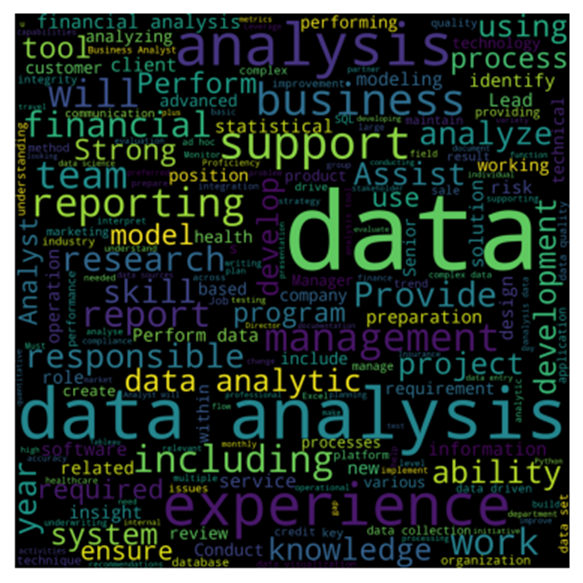


	This word cloud was obtained by gathering all the job descriptions provided in the job postings and sorting by the most used words.  We can see that data, analysis, data analysis, reporting, and experience are the most common words, which are to be expected of a job offer for a data analysis position.  Looking into other words on the word cloud, we can see the words data set, program, service, financial, statistical, management, application, data quality, modeling, analyzing, design, identify, data sources, trend, and software being used often in these job offerings.  This comes to no surprise as all of these relate to the responsibilities and skills of a data analyst.  A person that is interested in pursuing a job in Data Analytics can look at this word cloud as a checklist to see if they have the required discipline and skill set to have a good chance to get the job.  Other companies looking for data analysts can also use this word cloud as a guide for seeing what other companies expect to see in future employees, so they can be ensured they will not get an incapable employee by accident.
	With all these responsibilities and skills required to perform the job, it comes as no surprise that the salaries and wage rates of these positions are very high.  The average salary of all 930 jobs comes out to be approximately $95,000 a year, a very respectable figure to be earned.  This is only the average, however, as there are numerous jobs that come above and below this figure as seen by the word cloud below.


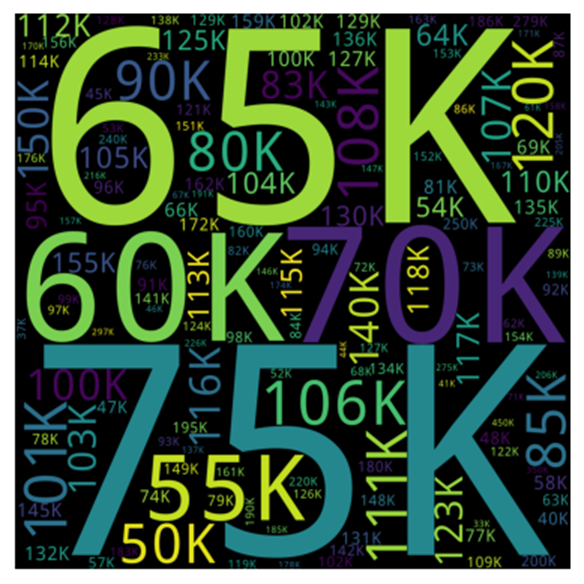


Right away we can see that our three most common salaries are $60,000, $65,000, $70,000, and $75,000.  These salaries are much lower than our average salary of $95,000.  Throughout the word cloud we can see very high figures such as $226,000 and $233,000, while also seeing very low figures such as $33,000 and $40,000.  This great diversity of salaries leads our average salary to end up being our calculated $95,000.
	In terms of working hourly, there is a significantly lower number of jobs that offered hourly wages as compared to annual salaries.  This is most likely due to these positions being entry-level such as internships or Jr Data Analysts.  Nonetheless, these jobs still offer a very high annual income.  We can see our hourly wages in the word cloud below.


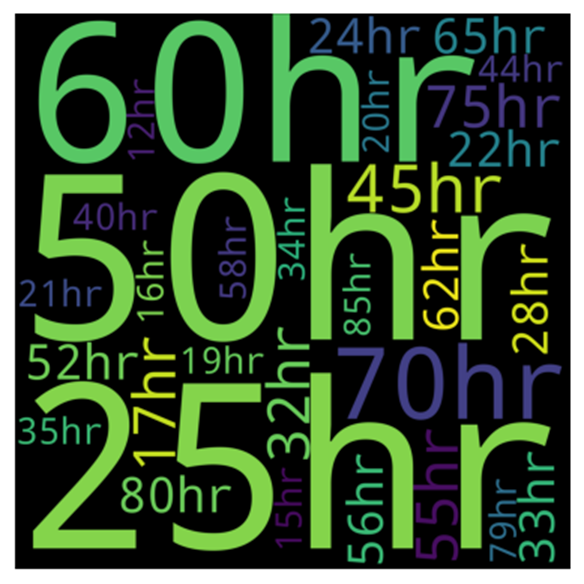


While the results may not look promising at first glance, we must take a further look into the data.  Our average hourly wage is $45 per hour.  If we assume a person works a 40-hour week for the 52 weeks of the year, this comes out to be approximately $93,600 annually.  This comes below our results for the salaries above, which were $95,000 annually.  This means that our hourly wages and salary hourly wages are nearly the same.  This differs greatly from the salaries in Philadelphia, PA, where the average salary is approximately $70,279.  This means that these hourly jobs on average earn $23,321 (33%) more than the average salary in Philadelphia, PA.
	After accounting for salary and hourly wage annual income, we end up with the following word cloud.


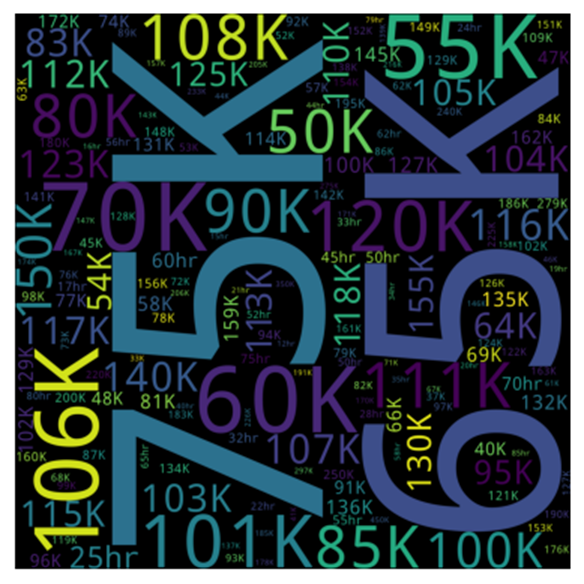


This looks very similar to our salary word cloud as most of the job postings used salary to display income, with very few using hourly wages to represent income.  This results in the average salary dropping slightly from $95,000 with the salary data to $92,000 with the salary and hourly data.  These jobs are more long-term as salary-based jobs tend to last longer as compared to hourly jobs.   Job seekers can use this as insight to see if their potential jobs are long-term or not, which in the case of Data Analytics in Philadelphia, they are long-term.
	Moving to the actual positions being offered by these companies, we can use another word cloud to illustrate.


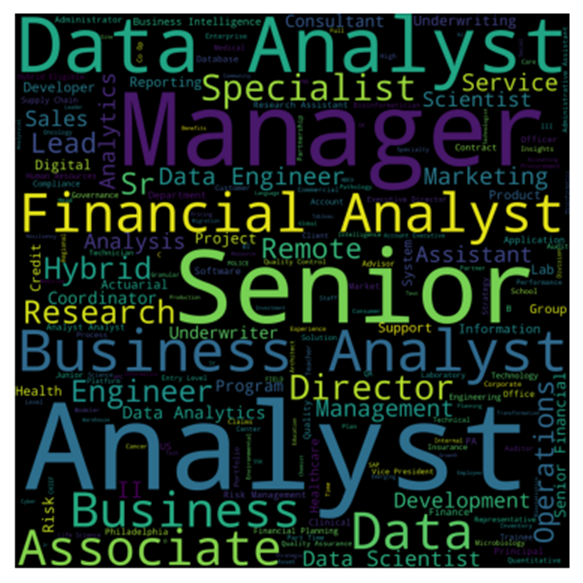


As we can see, our high salaries are explained directly through this word cloud.  The words Senior, Manager, Specialist, Engineer, Management and Lead are among the most used words in the job titles of the 930 positions.  These words are associated with high-end jobs within Data Analytics that are also paid high-end salaries, which could explain high salaries well above the average salary of $95,000.  These are the jobs that most likely carry the average salary up.  There are numerous common titles in this word cloud such as Associate, Assistant, and Support, which relate to lower-end jobs within Data Analytics that are paid lower-end salaries, which carries the average salary down.
	The companies that are searching for applicants the most are schools, medical institutions, governmental institutions, and banks.  This can be seen from the table below.


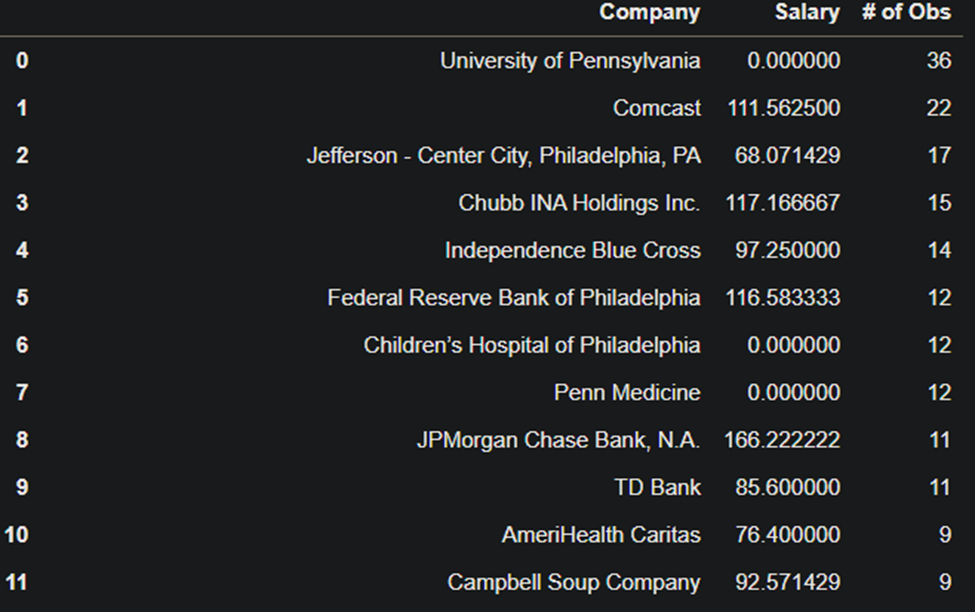


We can see that these companies that are looking for applicants the most vary significantly in their salaries.  Ignoring the missing salary values for 3 of the 12 companies, we can see that the salaries range from $68,071 to $166,222 annually.  Other values in this table supports this diversity in the salary values as there are many sub $90,000 values and many values over $100,000.  This shows that the salaries based off a company’s total number of observations does not mean salary will be higher or lower.  We are, however, able to see which companies would result in a higher salary on average, such as Comcast, Chubb INA Holdings Inc., Federal Reserve Bank of Philadelphia, and JPMorgan Chase Bank, N.A..
	We continue to search for a trend by looking at the distribution of salary averages based off job titles appearing in our data.  This can be seen from the table below.


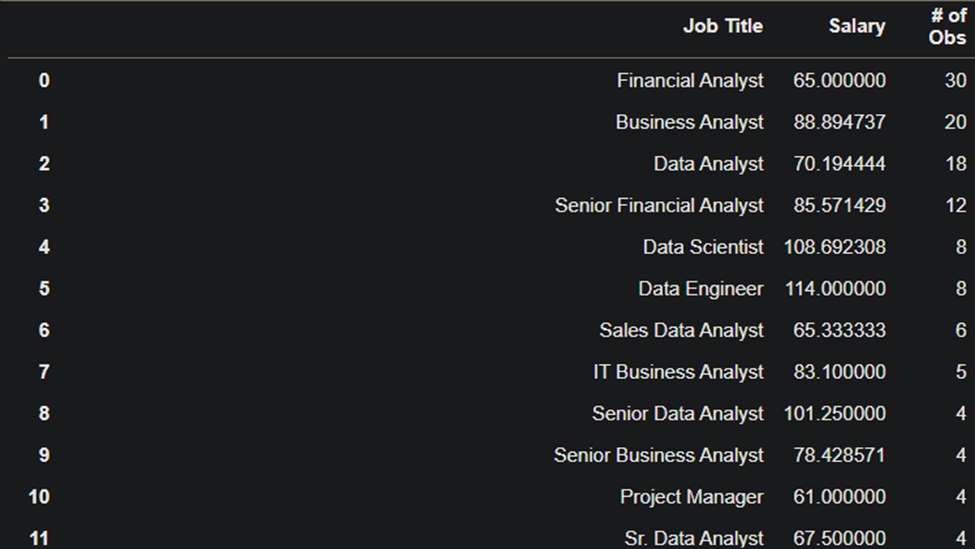


Based off the table above, there continues to be no correlation between salary and number of observations for a particular job title.  This is shown as we start off with an average salary of $65,000 with 30 observations and end up with an average salary of $67,500 with 4 observations.  In between the start and end, we seem to randomly go up and down in average salary with no trend in sight.  After all this, there continues to be no correlation that results in a higher salary.  We are, however, able to see which job titles would result in a higher salary on average, such as Data Scientist, Data Engineer, and Senior Data Analyst.
	Through our discoveries, we have been able to determine what a potential career in Data Analytics could look like.  This includes the average salary annually in the Data Analytics field, which companies pay the most on average, which job titles pay the most on average, and the most common jobs available along with the required responsibilities and skills that come with them.  It is safe to say that Data Analytics is very promising in terms of acquiring a future career!